In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
# upload data
df=pd.read_csv('co2_emission.csv')
df.head(2)

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0


# Asessing Data

In [164]:
# what are the countries in this data?
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas (other)',
       'Andorra', 'Angola', 'Anguilla', 'Antarctic Fisheries',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia and Pacific (other)', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Republic of the Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Republic of the Congo', 'Denmark',
 

In [165]:
# number of counties shared in this data
df['Entity'].nunique()

233

In [166]:
# number of countries which have code[abbreviation]
# which mean there are 11 country without a code
df['Code'].nunique()

222

In [167]:
list_col=list(df.columns)
for col in list_col:
    value=df[col].isnull().sum()
    print(col+ ':'+str(value))

Entity:0
Code:2207
Year:0
Annual CO₂ emissions (tonnes ):0


In [168]:
df['Code'].nunique()

222

In [169]:
df['Entity'].nunique()

233

In [170]:
df.groupby('Entity')['Annual CO₂ emissions (tonnes )'].sum().sort_values(ascending=False).head(10)

Entity
World                       1.575244e+12
United States               3.993783e+11
EU-28                       3.528583e+11
China                       2.001365e+11
Asia and Pacific (other)    1.780573e+11
Europe (other)              1.575402e+11
Russia                      1.005891e+11
Americas (other)            9.864116e+10
Germany                     9.056563e+10
United Kingdom              7.707106e+10
Name: Annual CO₂ emissions (tonnes ), dtype: float64

In [171]:
# which countries donnot have a code in this data
df[df.Code.isnull()].Entity.value_counts()

International transport      267
Asia and Pacific (other)     267
EU-28                        267
Statistical differences      267
Americas (other)             267
Europe (other)               267
Africa                       267
Middle East                  267
Kyrgysztan                    33
Antarctic Fisheries           21
Wallis and Futuna Islands     17
Name: Entity, dtype: int64

In [172]:
df.duplicated().any()

False

In [173]:
df.shape

(20853, 4)

In [174]:
df.dtypes

Entity                             object
Code                               object
Year                                int64
Annual CO₂ emissions (tonnes )    float64
dtype: object

# DATA ANALYSIS 

## QUESTION POINTS:
* What are the most 20 countries produce the largest amount of pollution?
* Express the relation between the amount of pollution across the years in line chart for top 3 countries ?
* show the distribution of pollution amount for the top 3 countries which reduced their pollution amount?
* Express the relation between the years and the total amount of pollution in it in a chart ?
* What is the average for increasing in pollution amount across the years?

# FIRST point :
### What are the most 20 countries produce the largest amount of pollution ?

In [175]:
df_top20=df.groupby('Entity')['Annual CO₂ emissions (tonnes )'].sum().sort_values(ascending=False).head(20)
df_top20=pd.DataFrame(df_top20.reset_index())
df_top20

,Entity,Annual CO₂ emissions (tonnes )
0,World,1.575244e+12
1,United States,3.993783e+11
2,EU-28,3.528583e+11
3,China,2.001365e+11
4,Asia and Pacific (other),1.780573e+11
5,Europe (other),1.575402e+11
6,Russia,1.005891e+11
7,Americas (other),9.864116e+10
8,Germany,9.056563e+10
9,United Kingdom,7.707106e+10


## The distribution of pollution amount through years for top 3 countries in pollution( united states , EU-28 , china)


* **UNITED STATES**

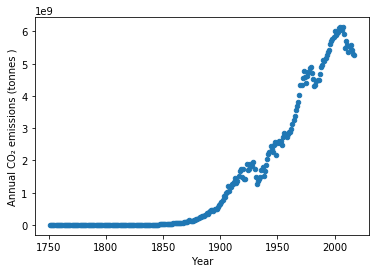

In [176]:
#United States
df[df['Entity']=='United States'].plot(x ='Year', y='Annual CO₂ emissions (tonnes )',kind = 'scatter')
plt.show()

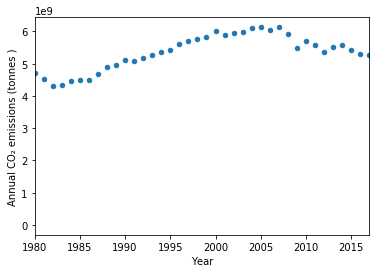

In [177]:
# in last 30 year
df[df['Entity']=='United States'].plot(x ='Year', y='Annual CO₂ emissions (tonnes )',kind = 'scatter')
plt.xlim(1980, 2017)
plt.show()

* **EU-28**

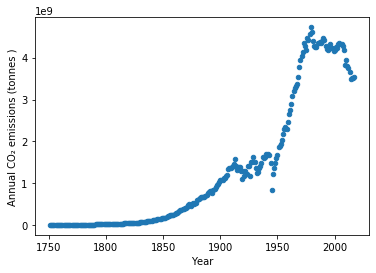

In [178]:
#EU-28
df[df['Entity']=='EU-28'].plot(x ='Year', y='Annual CO₂ emissions (tonnes )',kind = 'scatter')
plt.show()

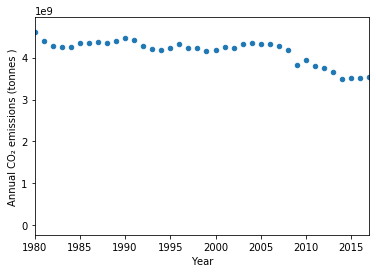

In [179]:
# in last 30 year
df[df['Entity']=='EU-28'].plot(x ='Year', y='Annual CO₂ emissions (tonnes )',kind = 'scatter')
plt.xlim(1980,2017)
plt.show()

* **CHINA**

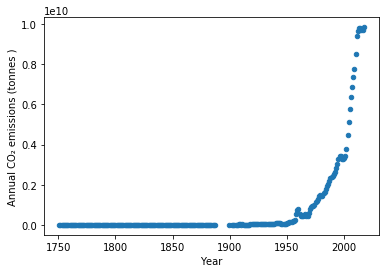

In [180]:
#china 
df[df['Entity']=='China'].plot(x ='Year', y='Annual CO₂ emissions (tonnes )',kind = 'scatter')
plt.show()

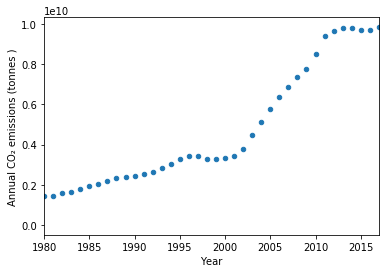

In [181]:
# in last 30 year
df[df['Entity']=='China'].plot(x ='Year', y='Annual CO₂ emissions (tonnes )',kind = 'scatter')
plt.xlim(1980,2017)
plt.show()

#  show the distribution of the summation pollution amount for the last years for each country?


In [182]:
d=df['Year'].sort_values(ascending=True).unique()[-3:]
data_last3years=df[df.Year.isin(d)]
data_last3years=data_last3years.groupby('Entity')['Annual CO₂ emissions (tonnes )'].sum()
data_last3years=pd.DataFrame(data_last3years.reset_index())
data_last3years.sort_values('Annual CO₂ emissions (tonnes )',ascending=False)

,Entity,Annual CO₂ emissions (tonnes )
218,World,1.072911e+11
43,China,2.925970e+10
211,United States,1.600120e+10
12,Asia and Pacific (other),1.490637e+10
59,EU-28,1.057021e+10
...,...,...
132,Montserrat,1.510981e+05
217,Wallis and Futuna Islands,7.416515e+04
206,Tuvalu,3.708258e+04
145,Niue,3.708258e+04


### Comment:
* from the data we see china ,united states ,Asia and Pacific are the top countries which produce the huge amounts from co2 ,which tell us there are an increase in industry and cars.
 

# For all countries the distribution of co2 amounts across the years .

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\ENTER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
A

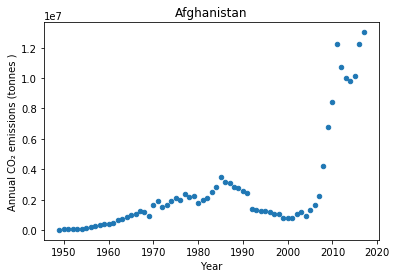

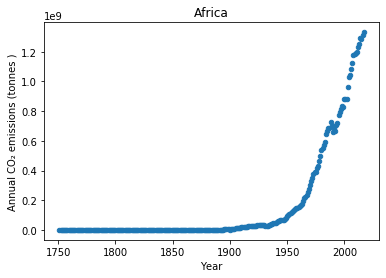

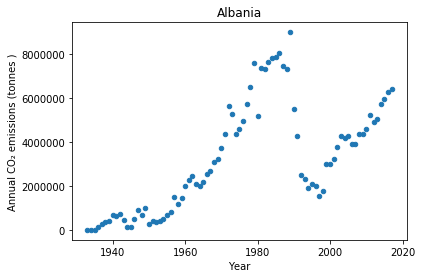

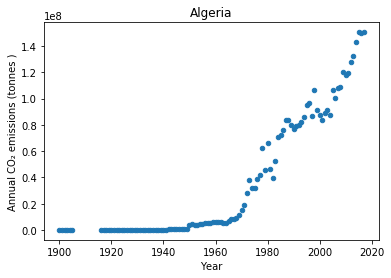

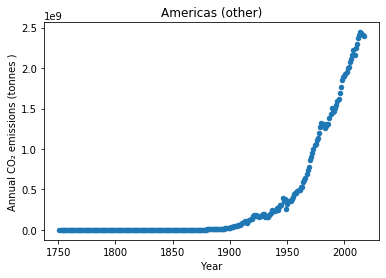

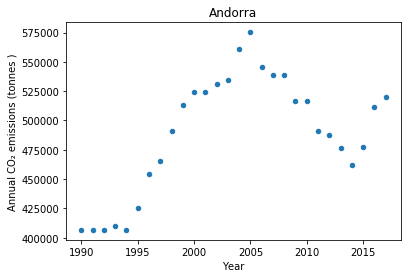

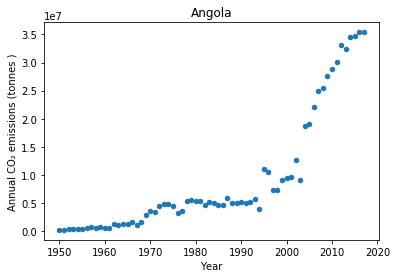

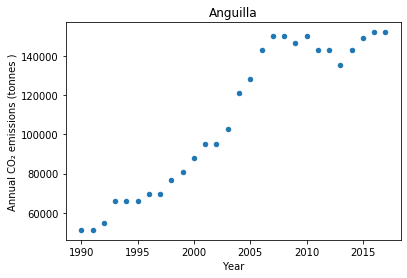

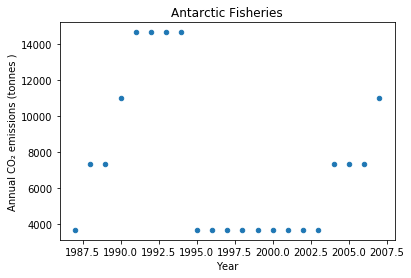

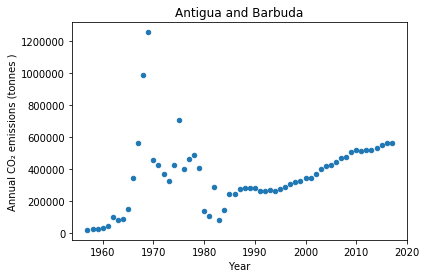

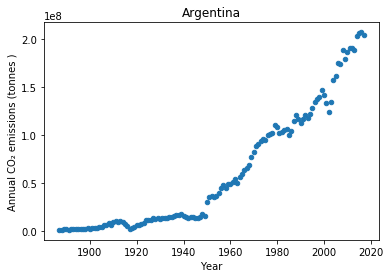

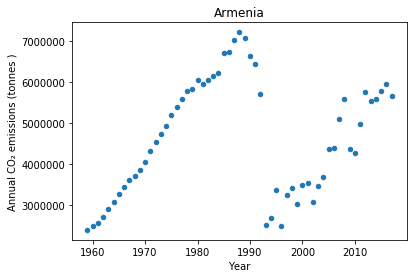

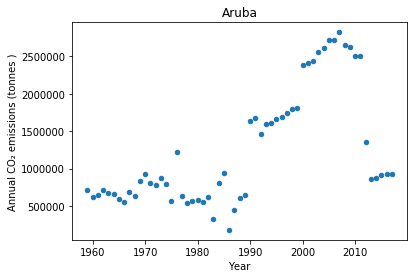

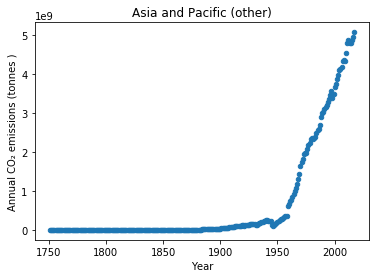

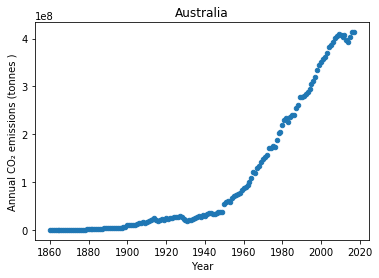

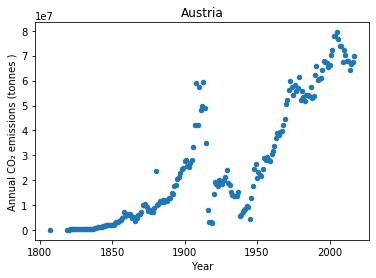

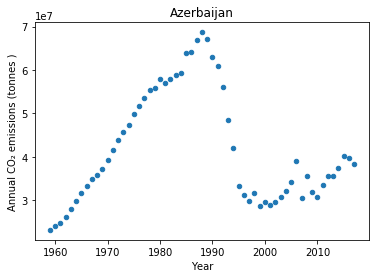

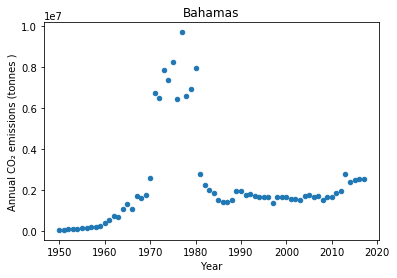

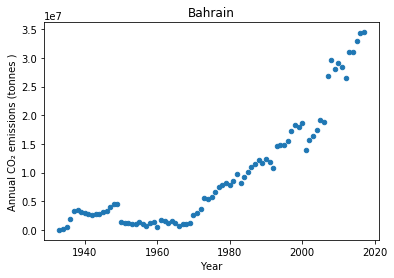

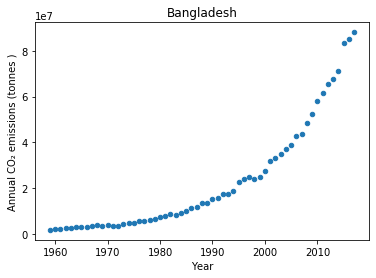

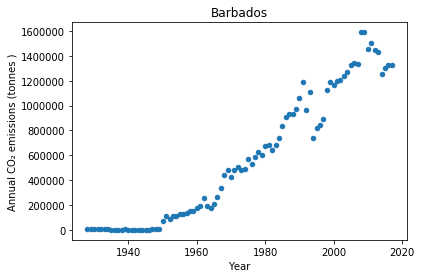

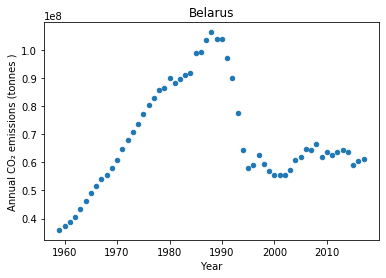

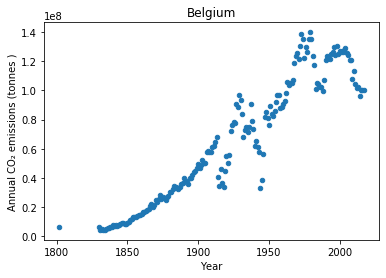

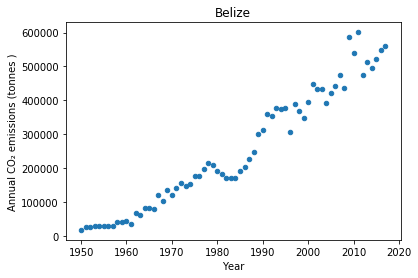

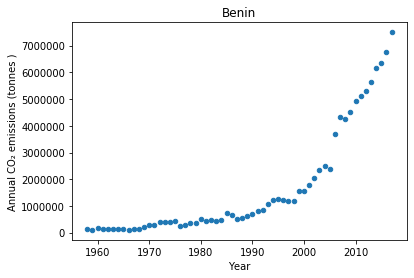

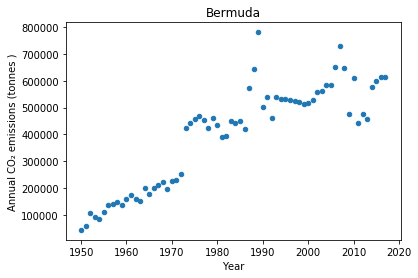

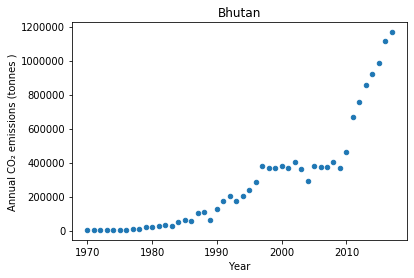

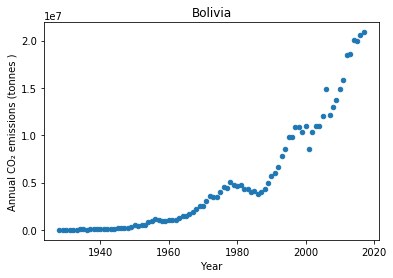

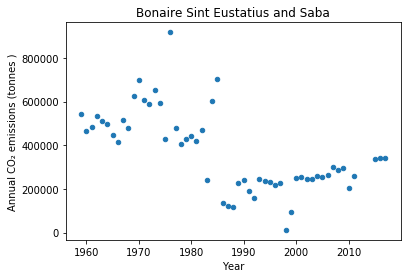

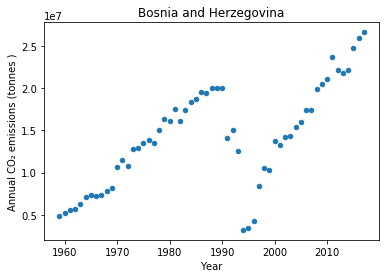

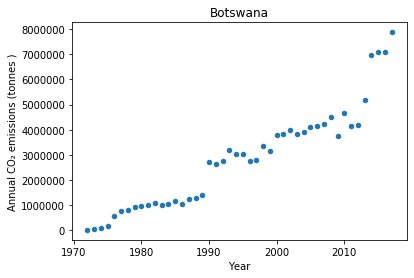

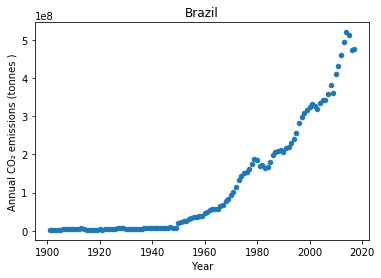

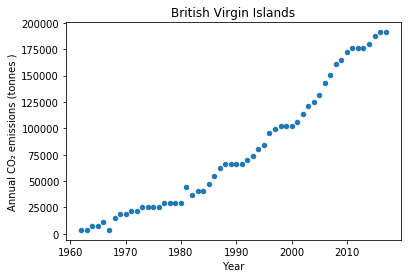

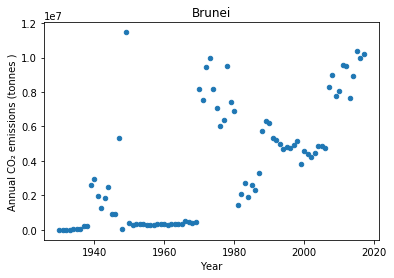

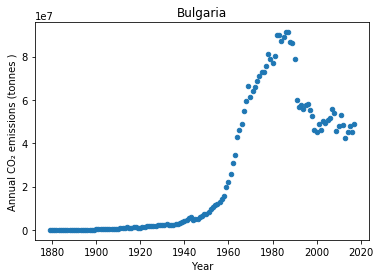

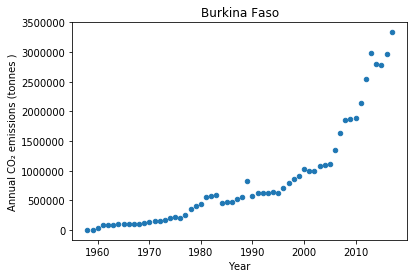

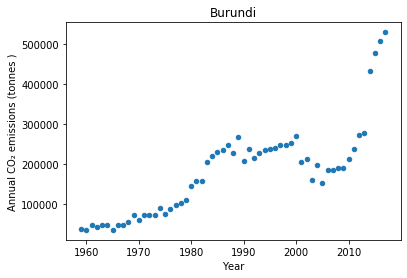

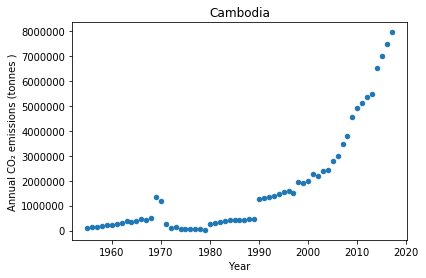

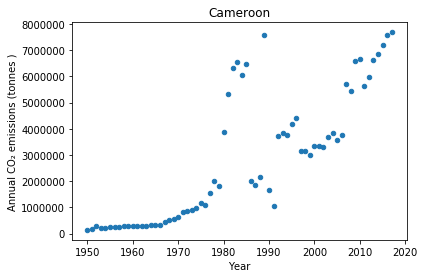

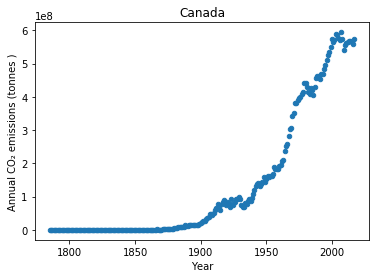

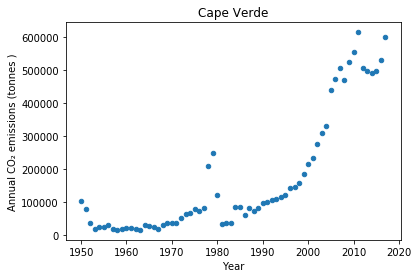

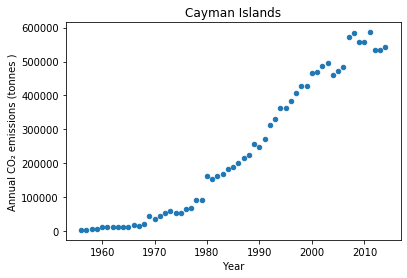

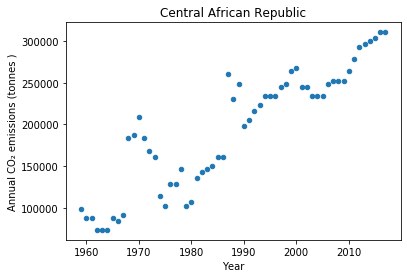

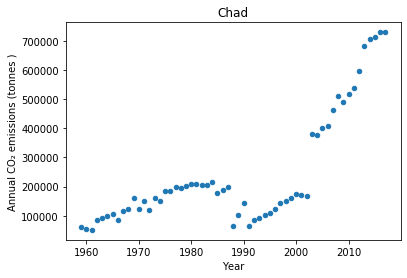

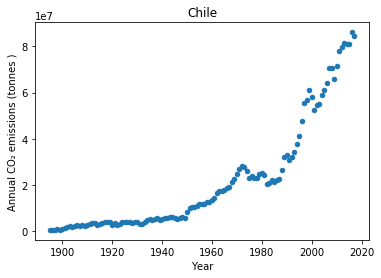

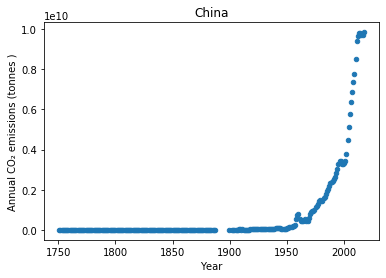

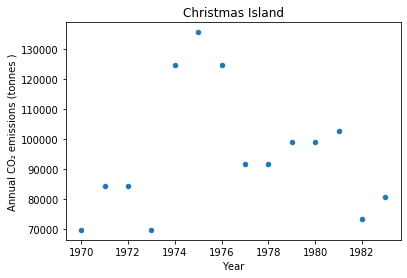

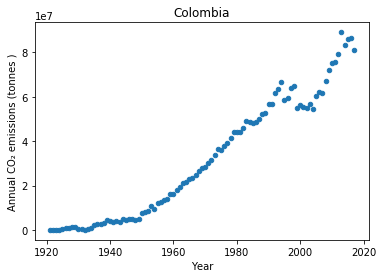

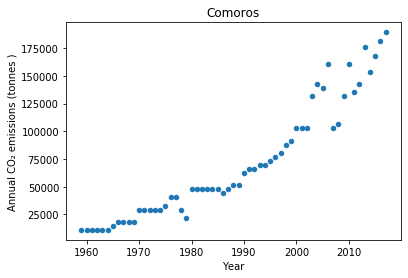

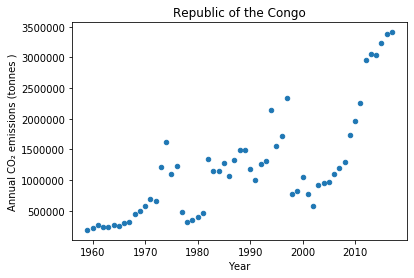

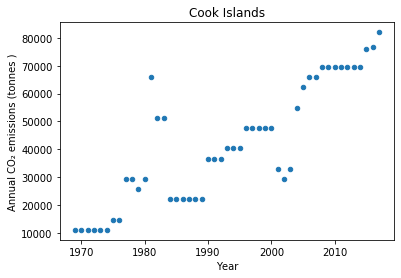

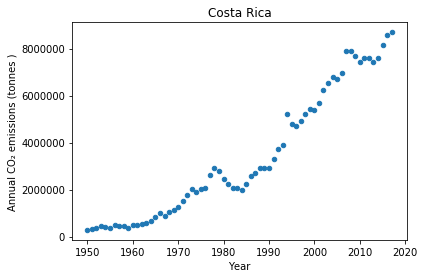

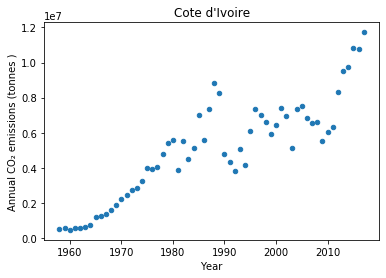

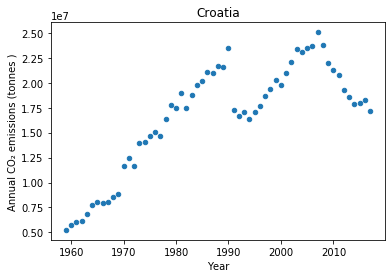

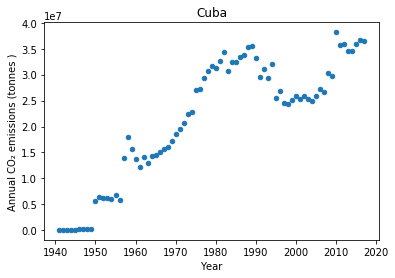

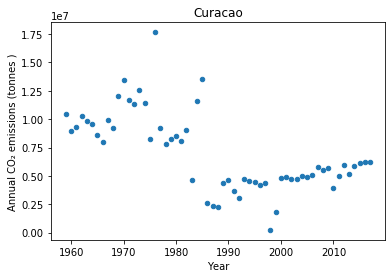

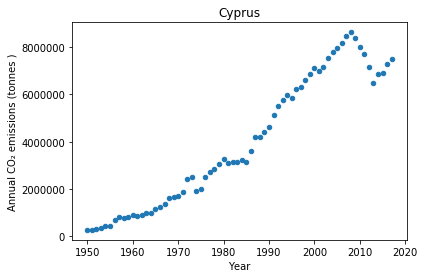

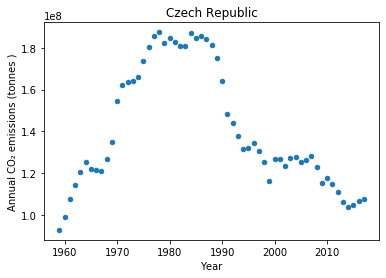

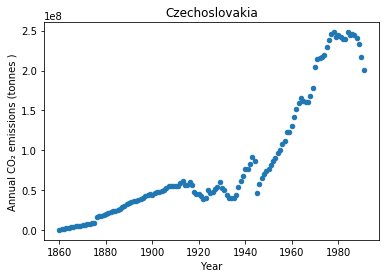

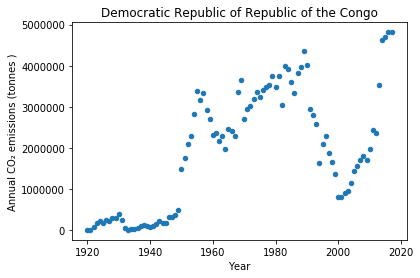

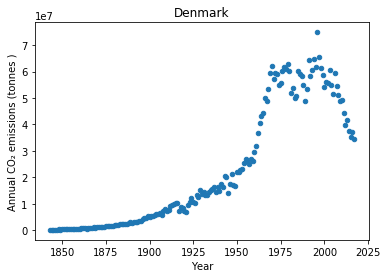

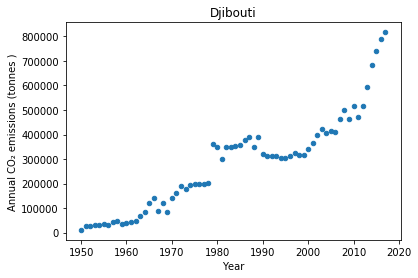

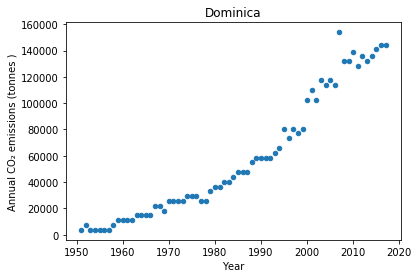

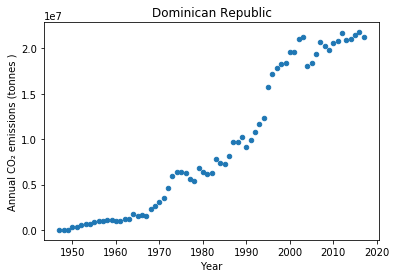

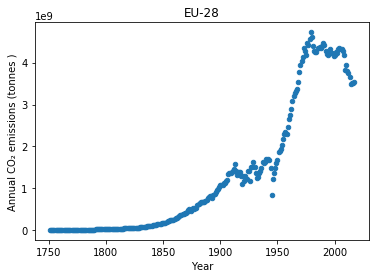

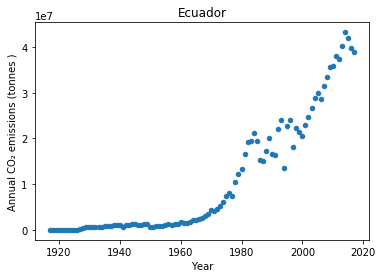

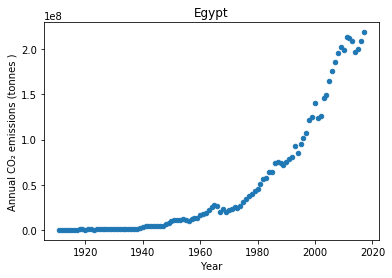

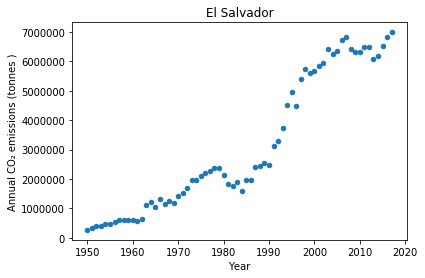

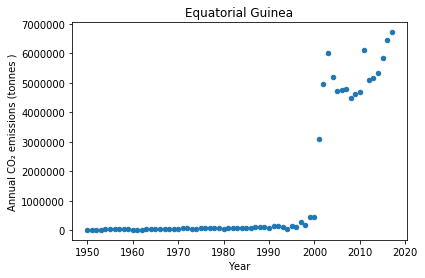

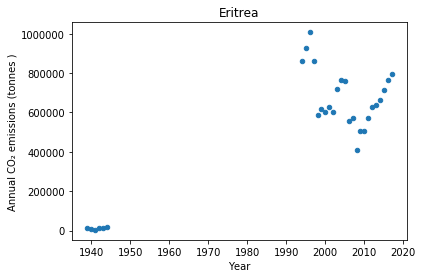

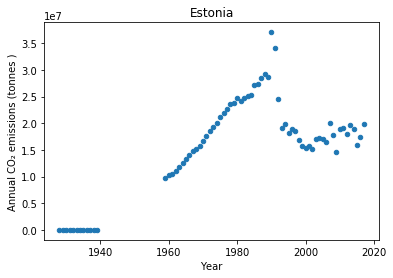

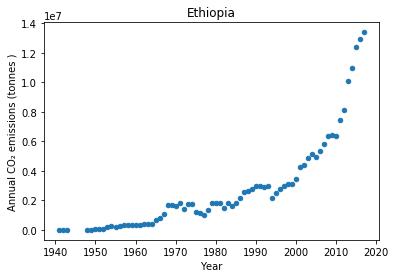

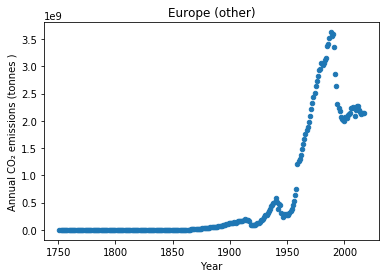

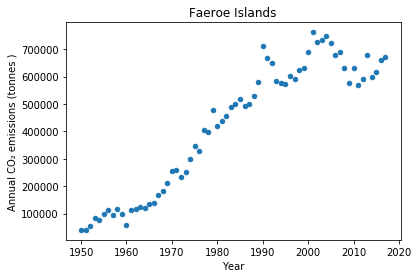

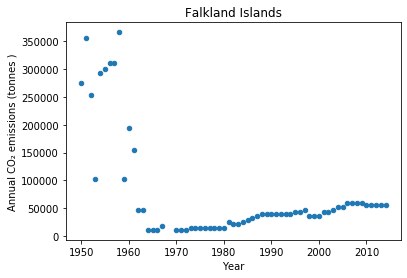

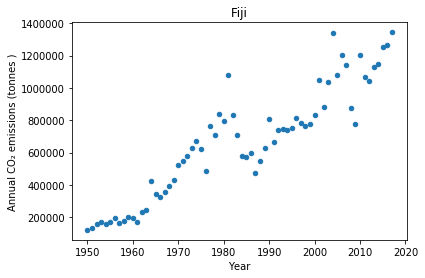

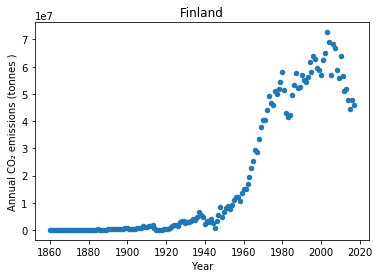

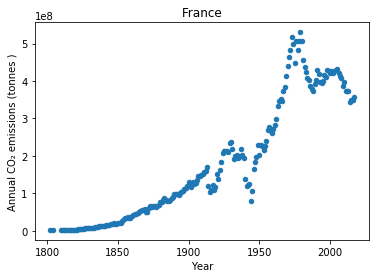

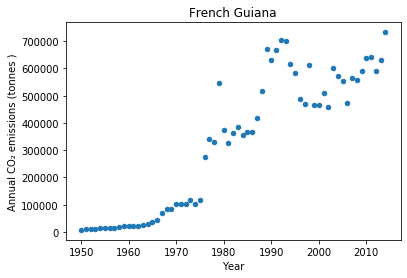

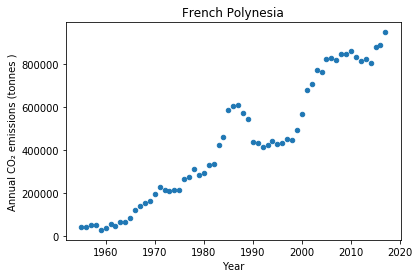

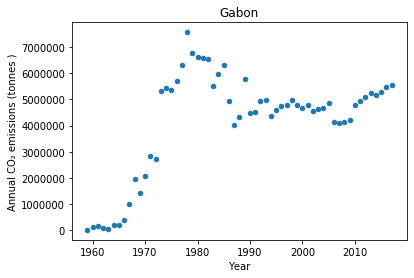

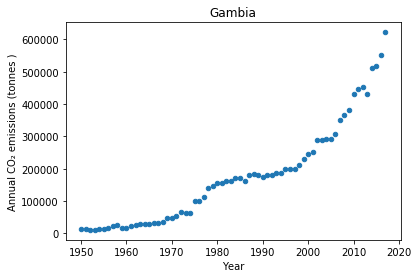

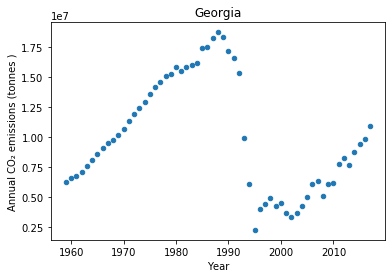

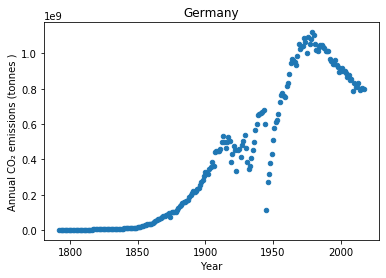

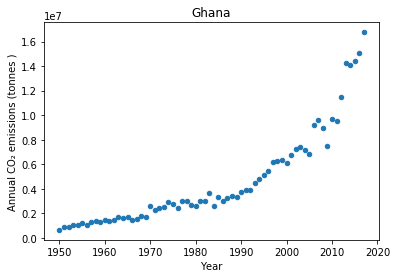

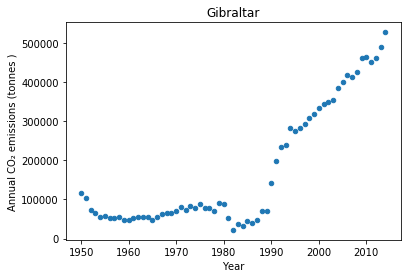

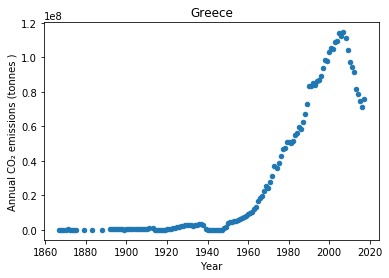

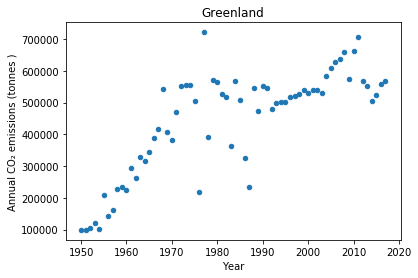

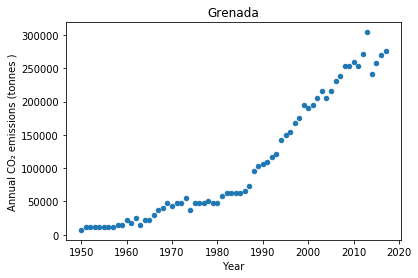

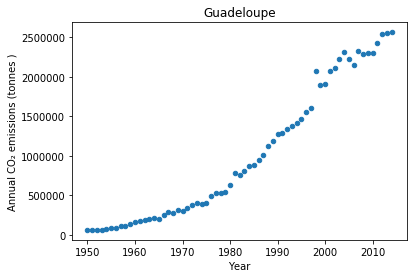

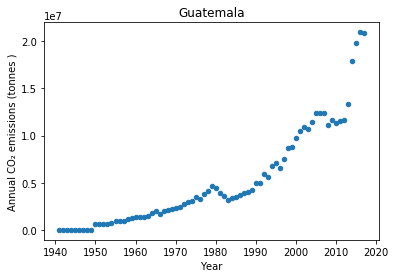

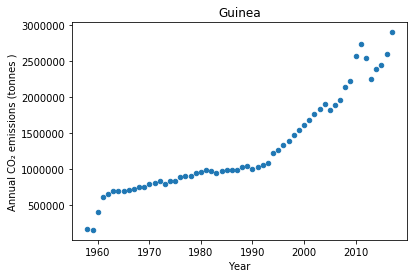

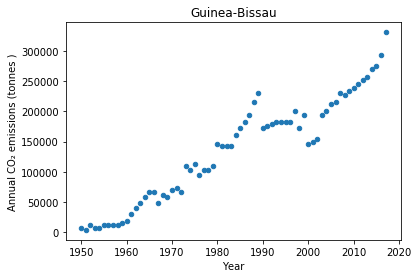

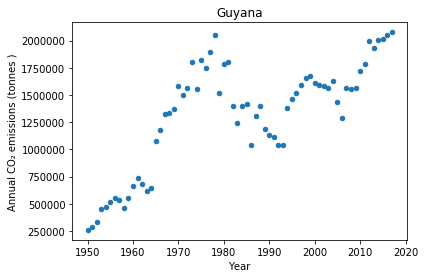

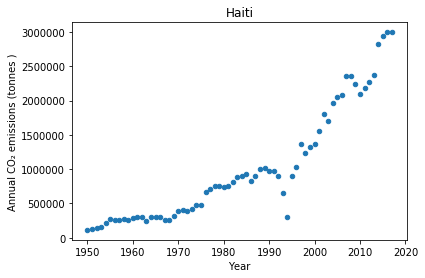

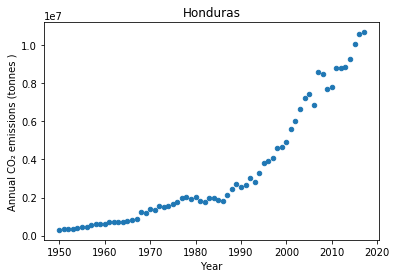

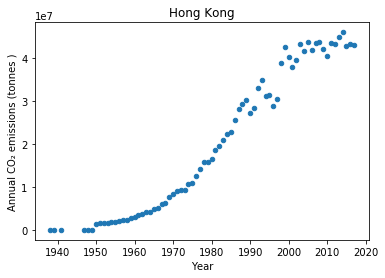

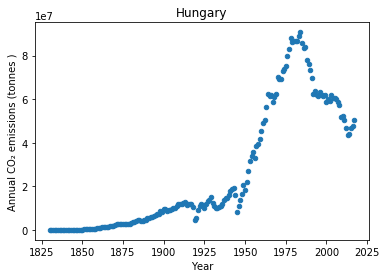

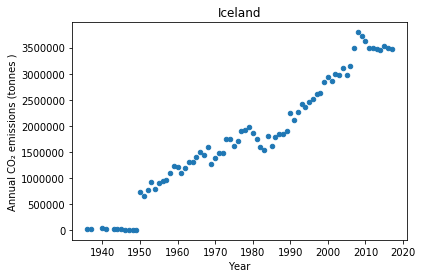

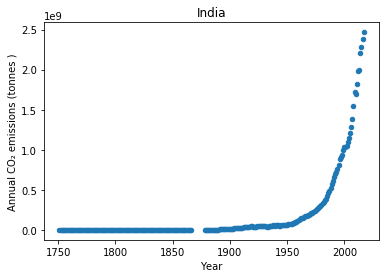

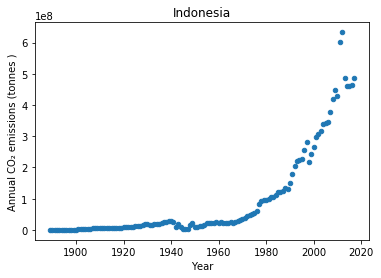

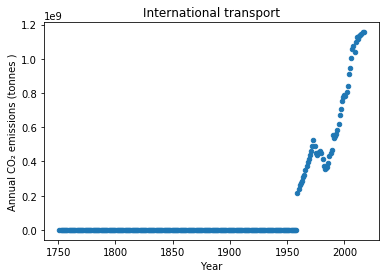

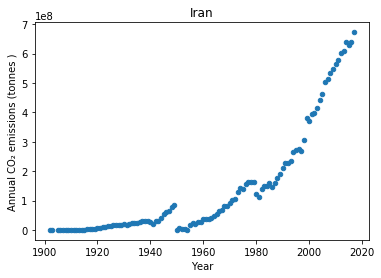

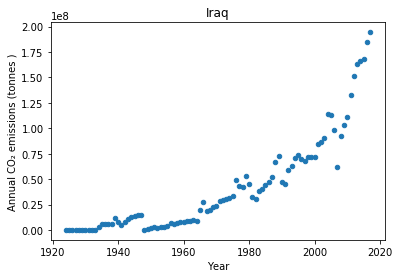

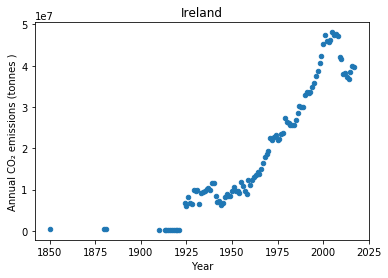

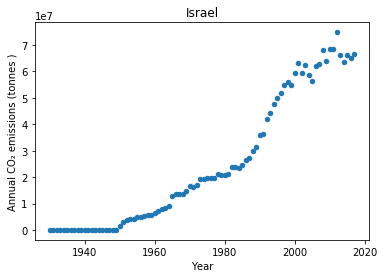

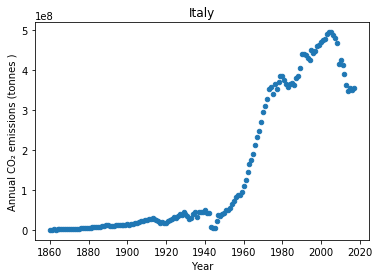

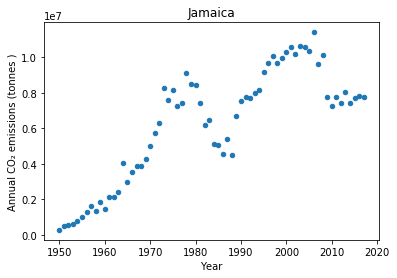

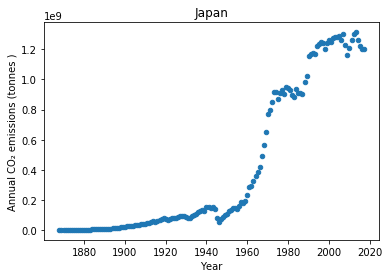

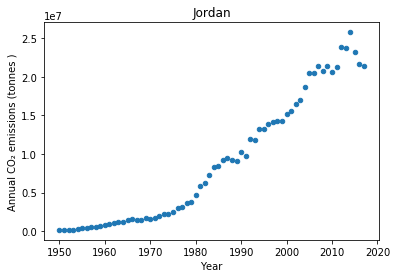

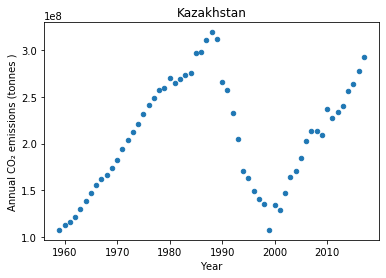

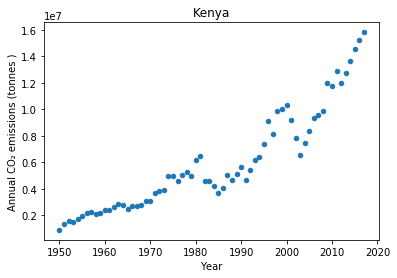

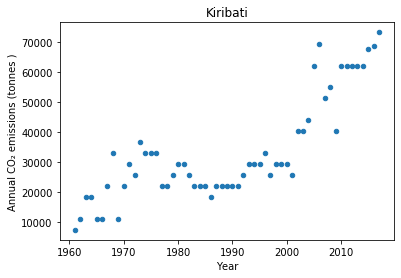

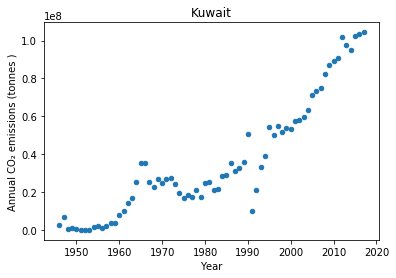

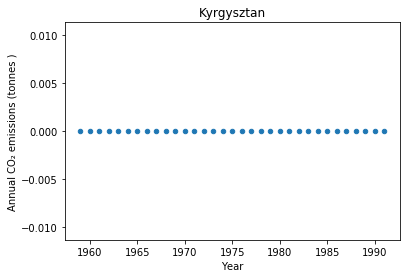

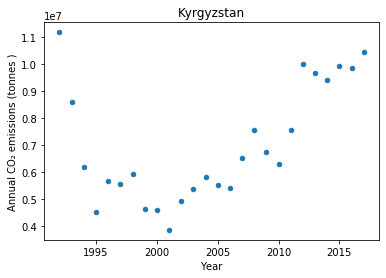

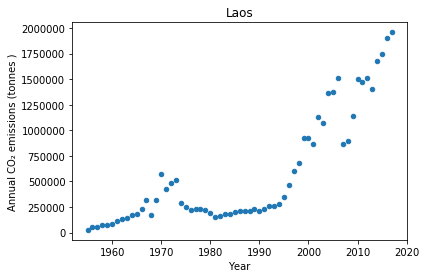

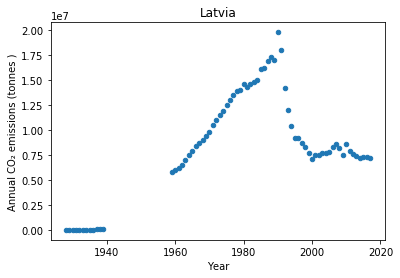

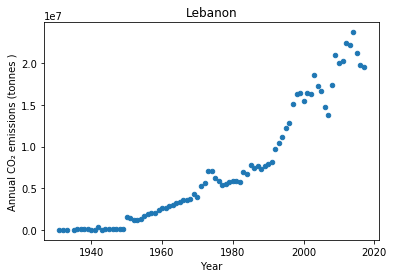

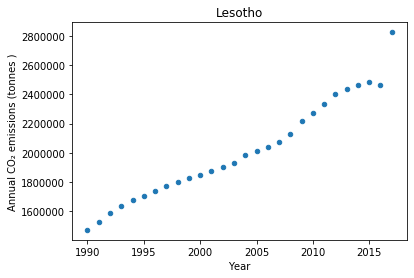

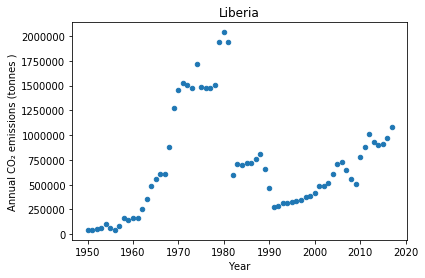

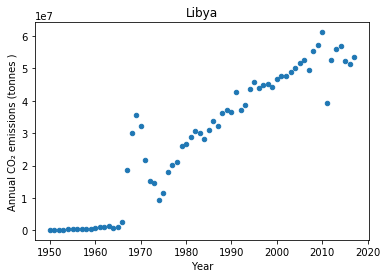

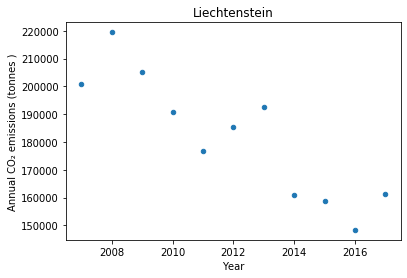

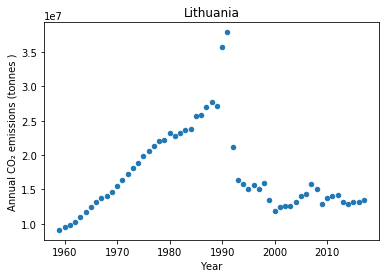

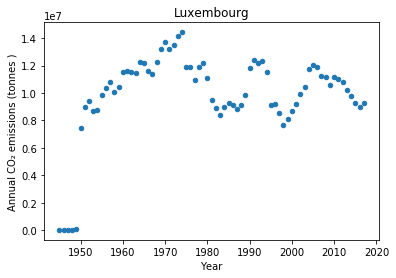

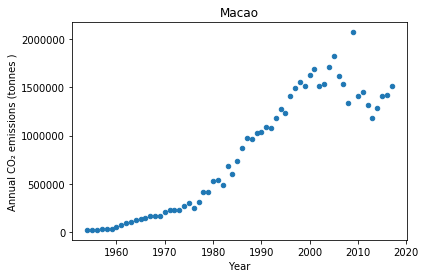

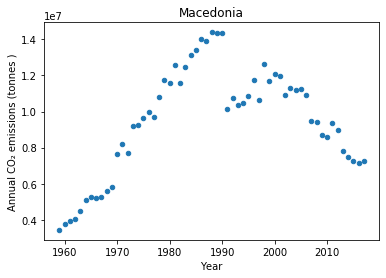

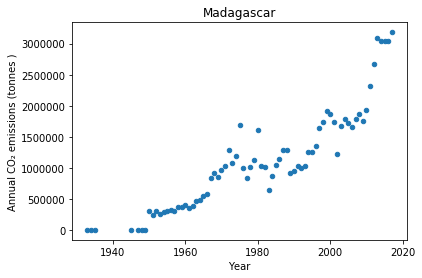

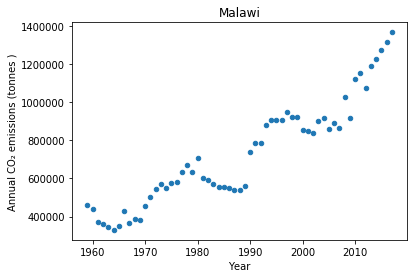

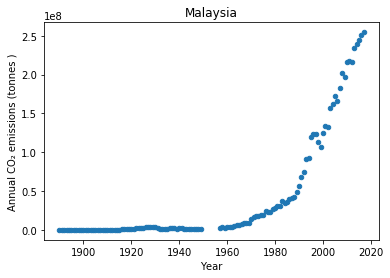

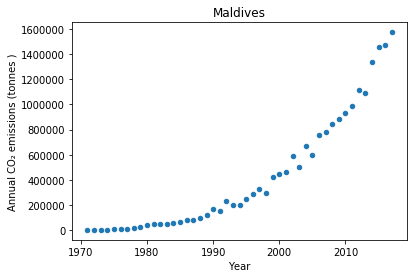

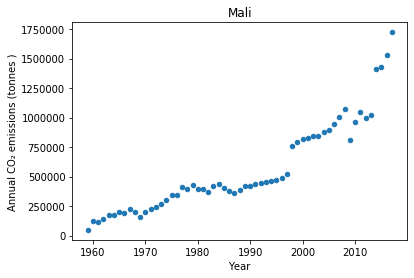

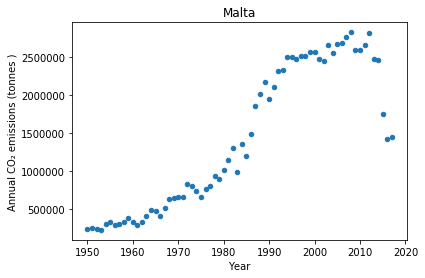

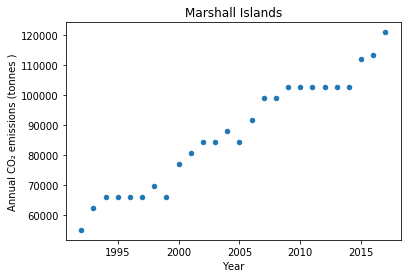

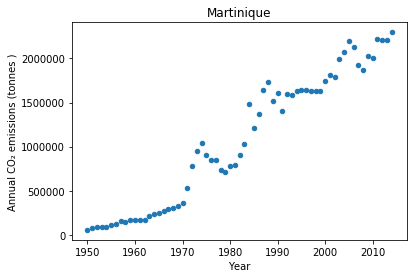

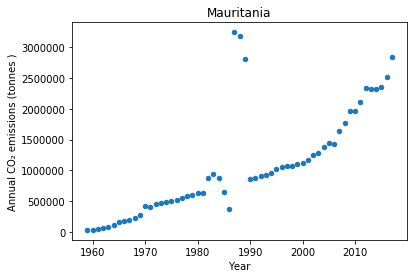

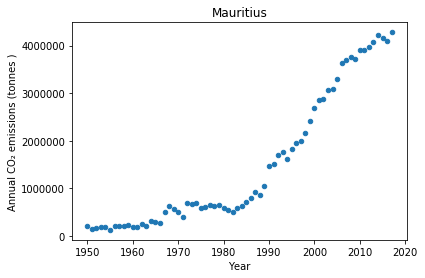

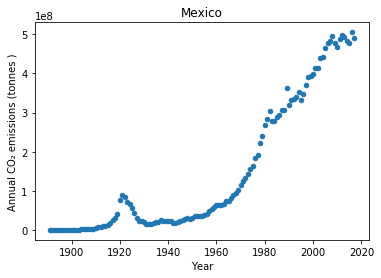

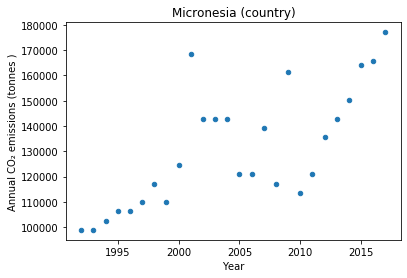

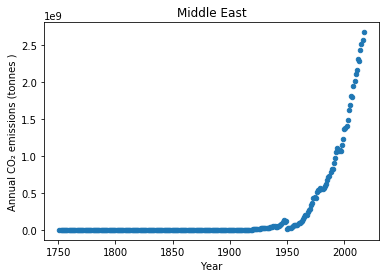

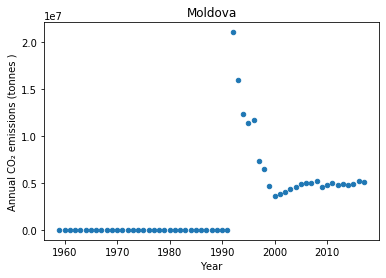

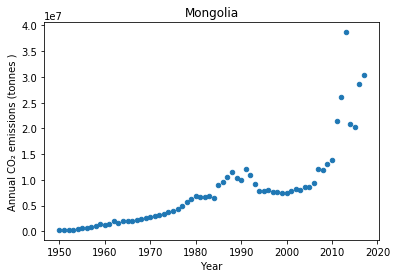

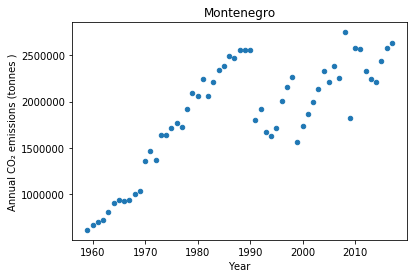

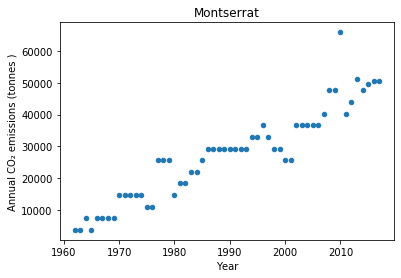

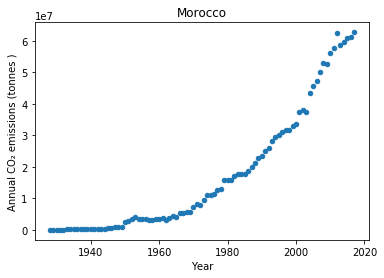

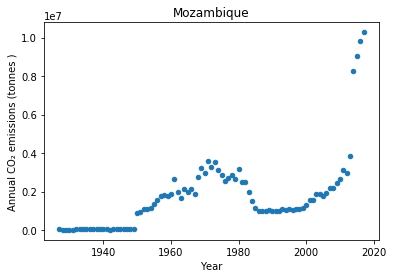

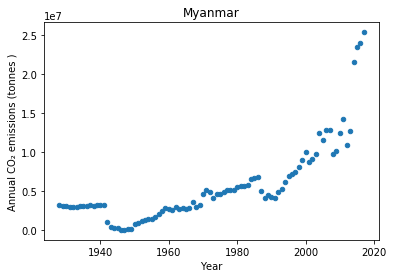

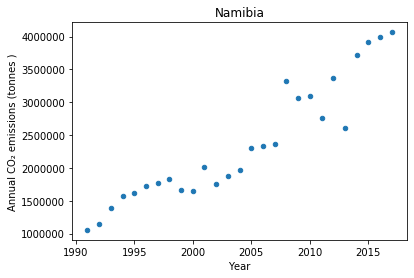

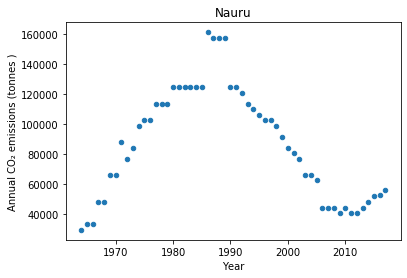

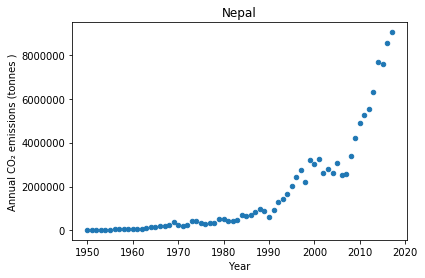

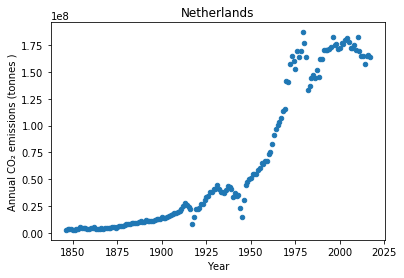

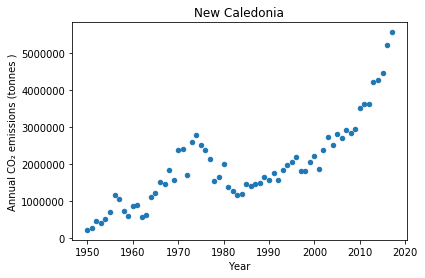

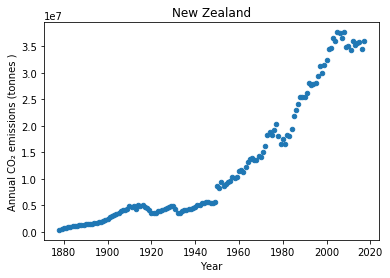

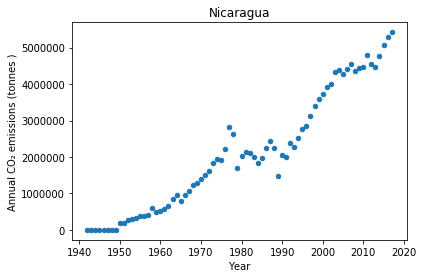

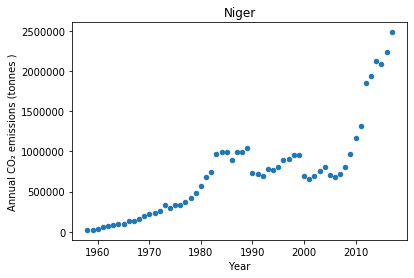

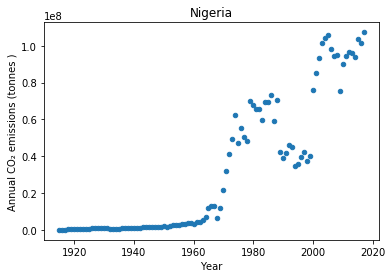

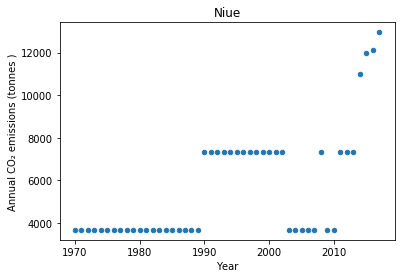

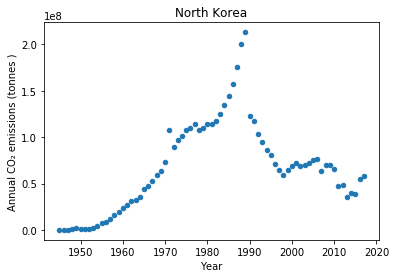

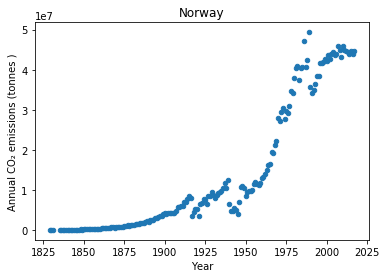

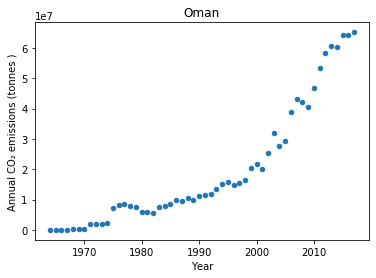

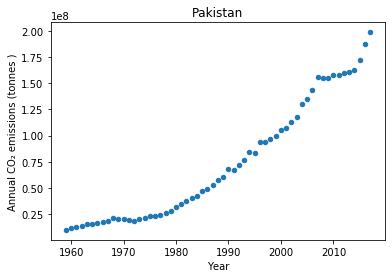

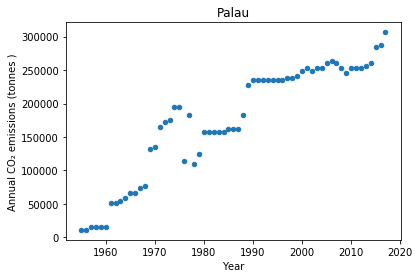

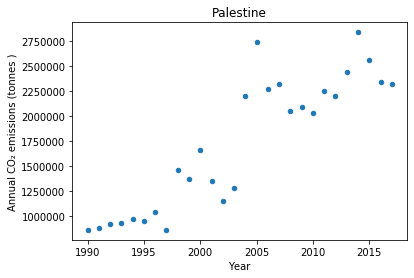

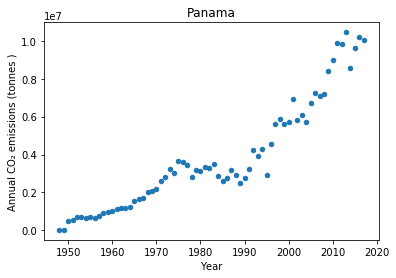

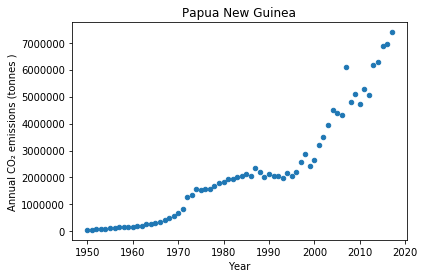

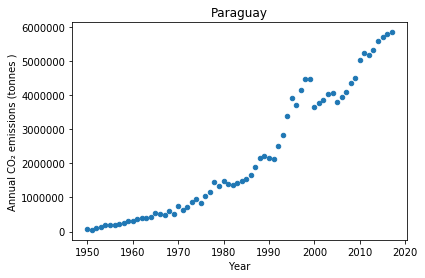

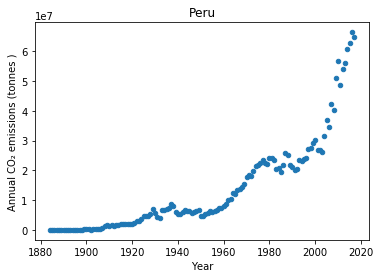

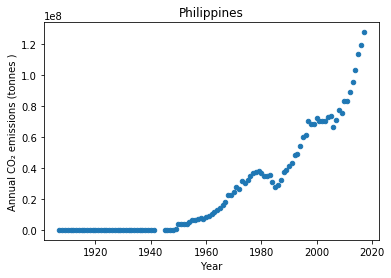

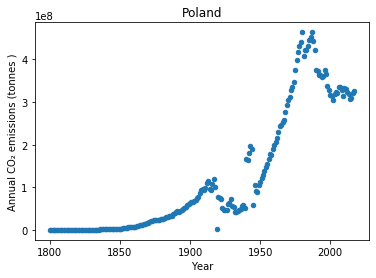

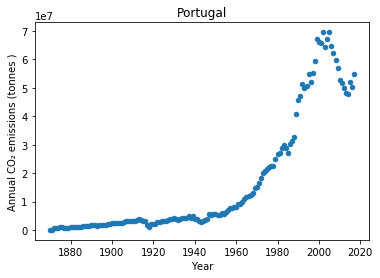

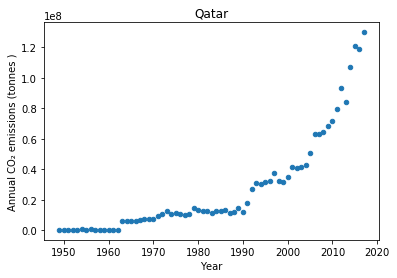

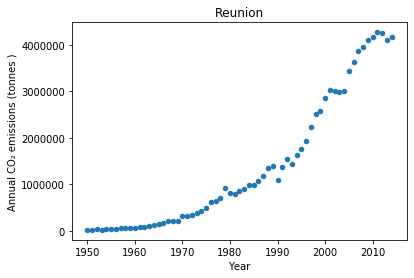

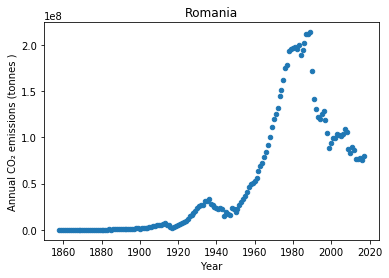

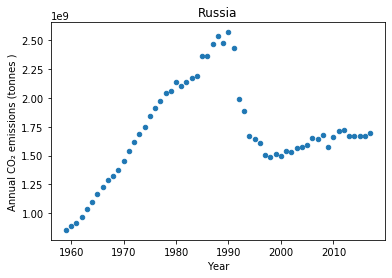

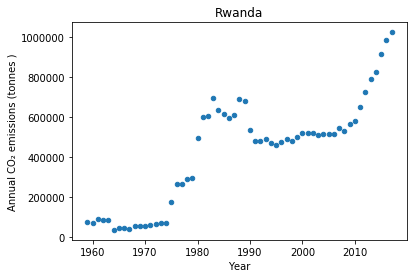

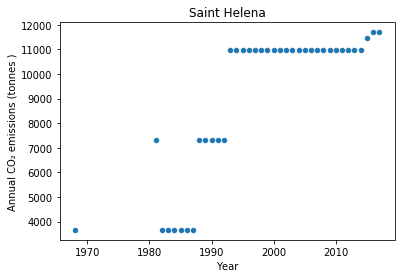

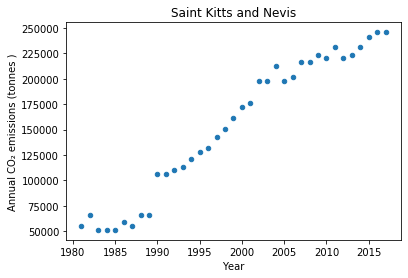

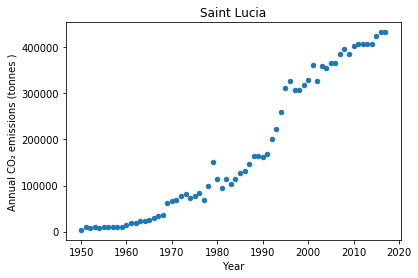

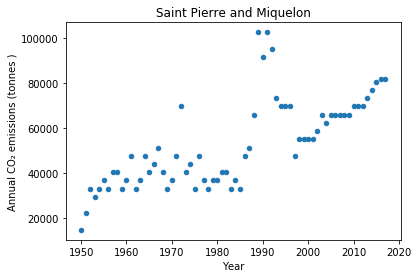

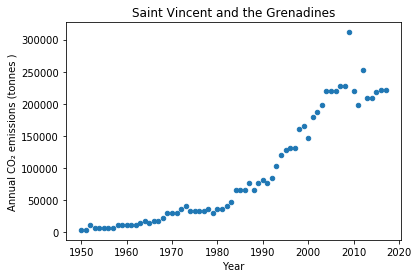

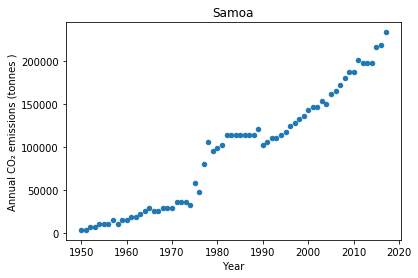

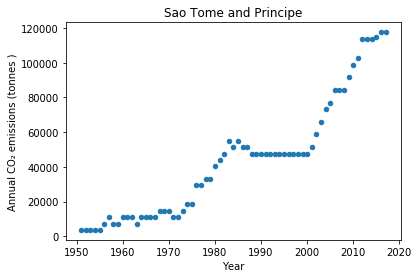

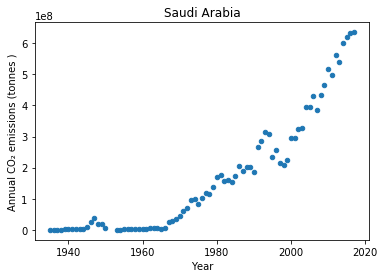

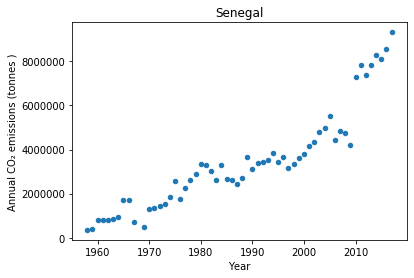

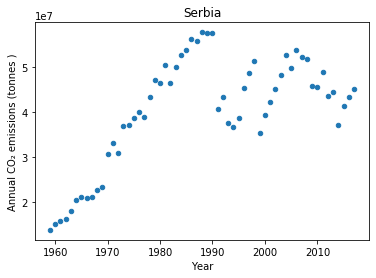

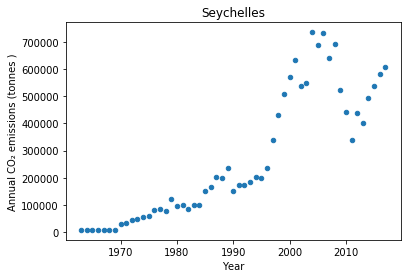

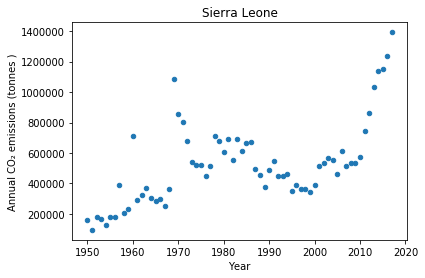

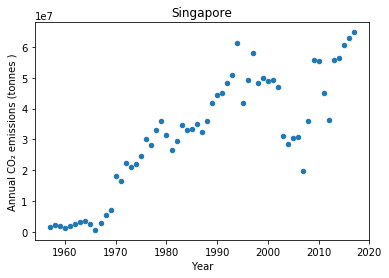

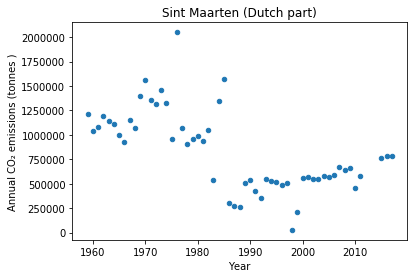

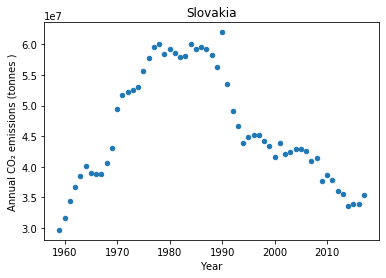

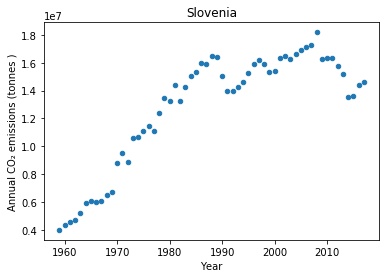

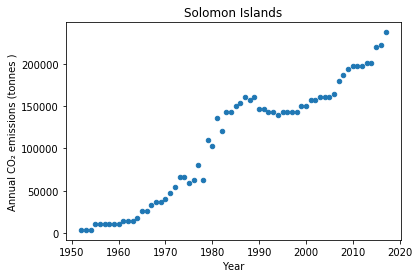

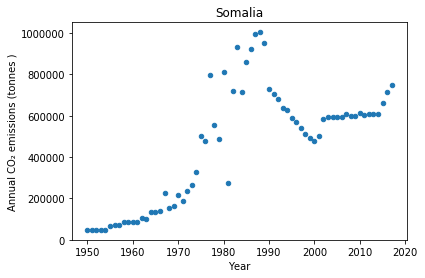

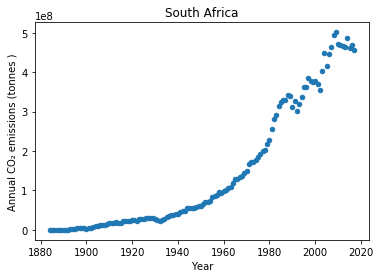

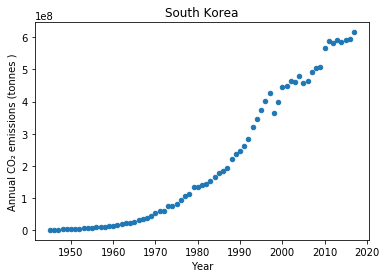

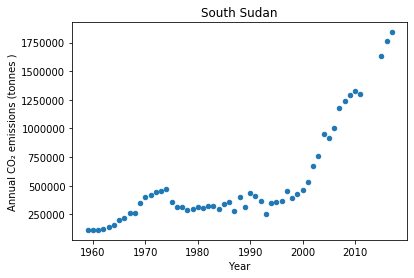

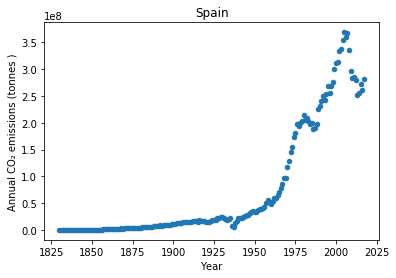

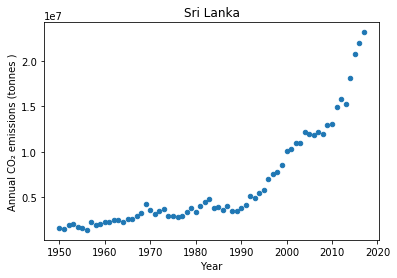

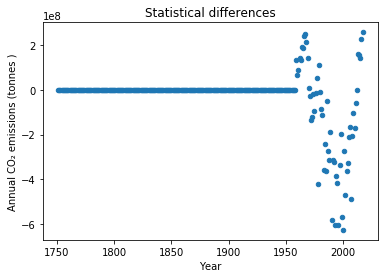

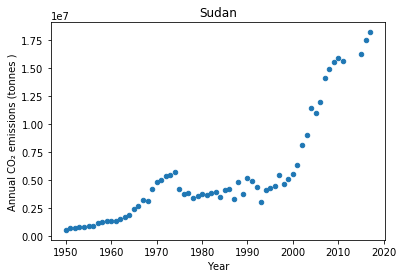

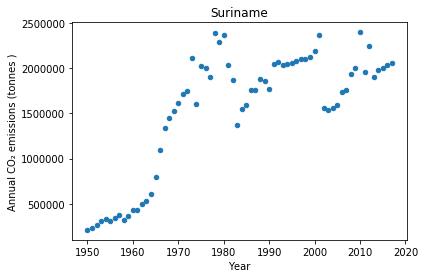

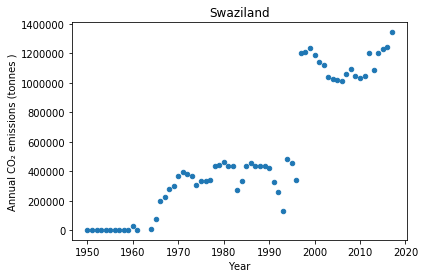

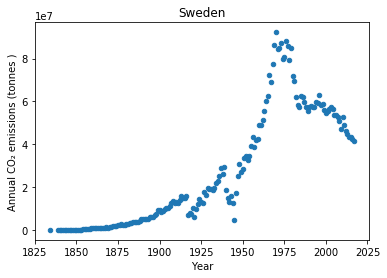

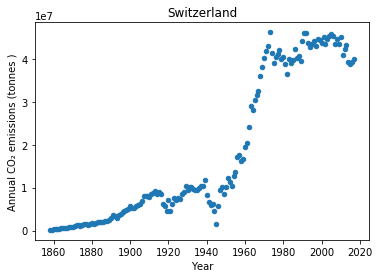

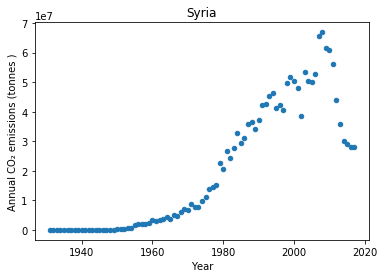

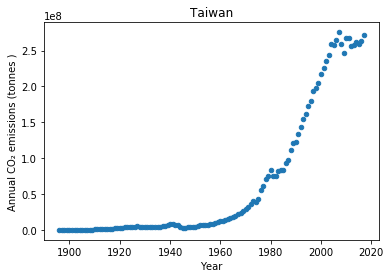

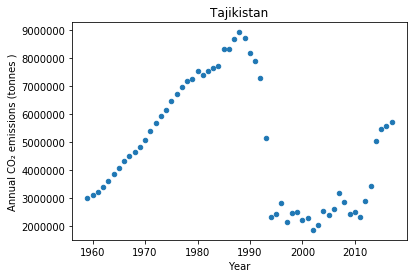

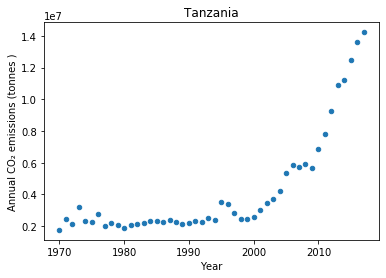

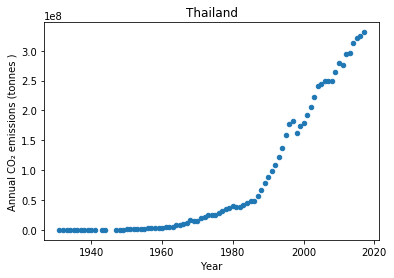

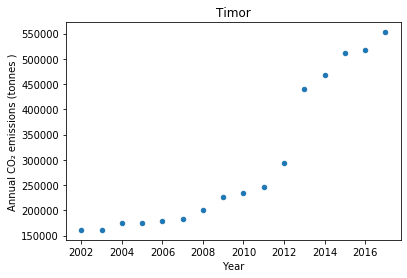

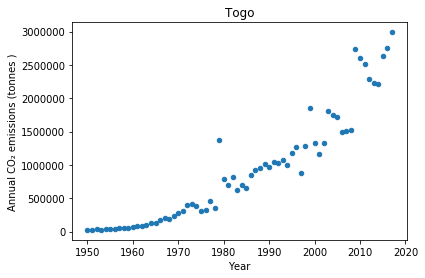

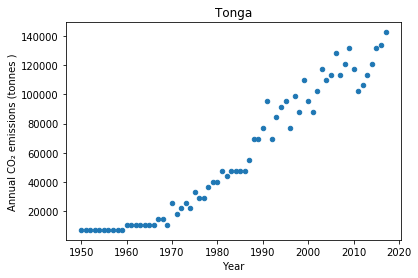

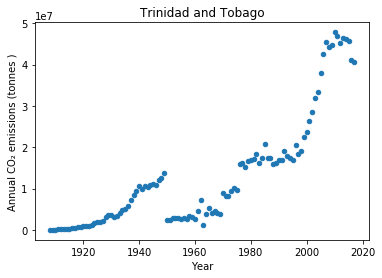

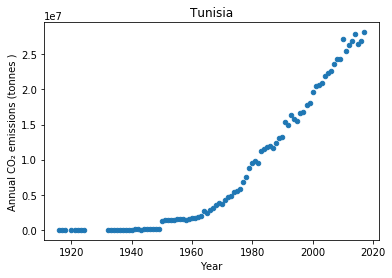

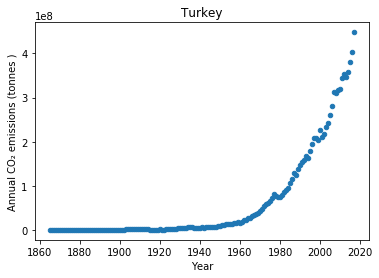

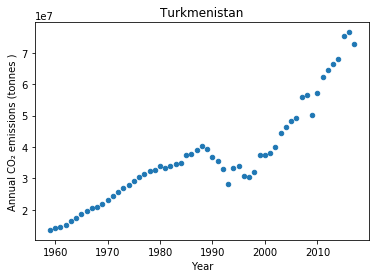

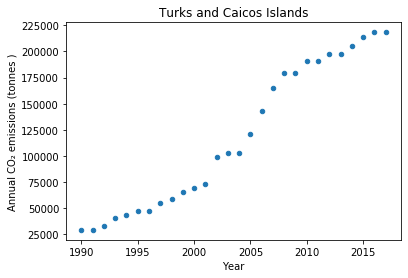

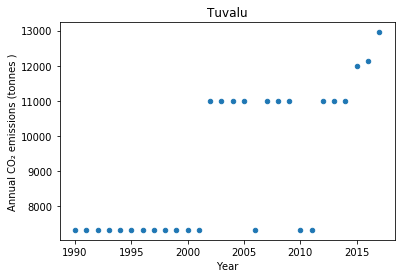

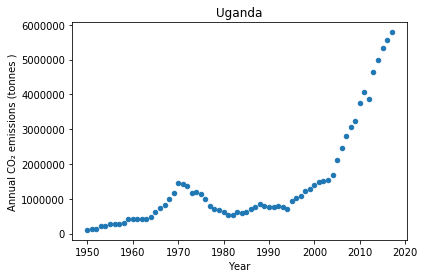

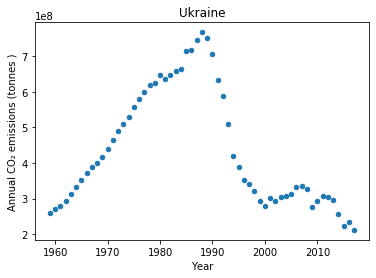

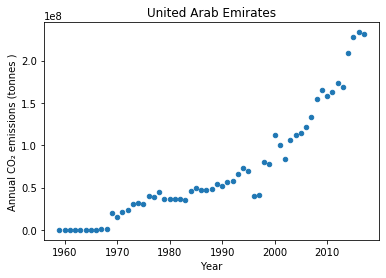

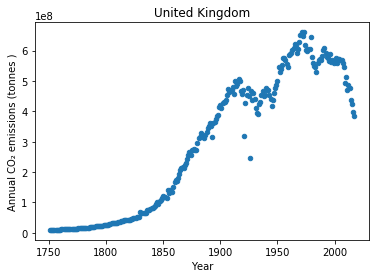

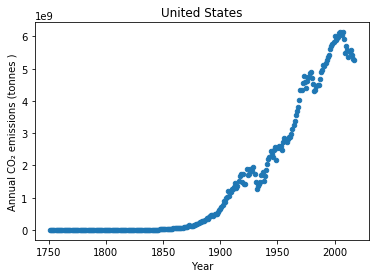

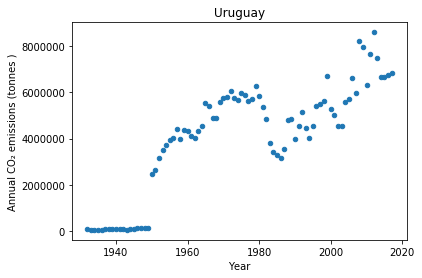

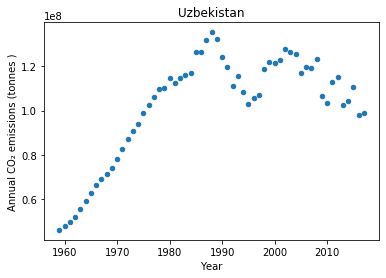

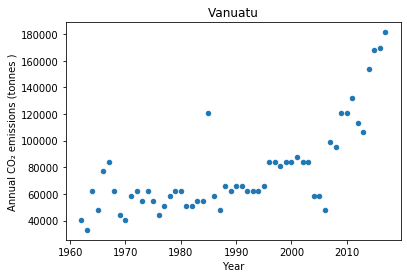

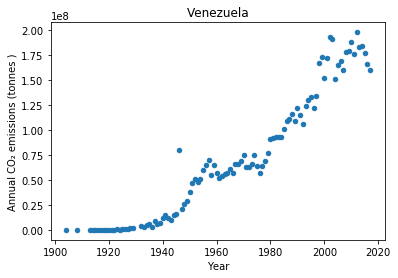

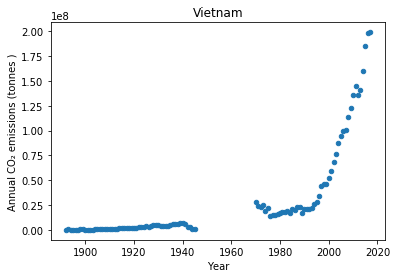

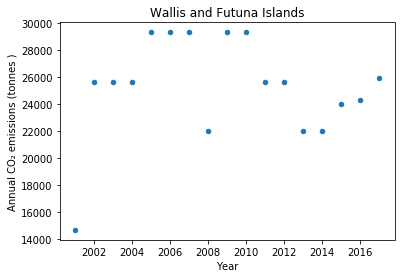

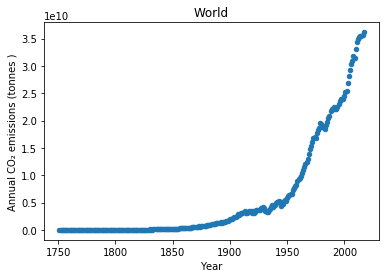

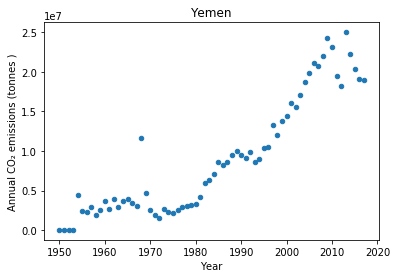

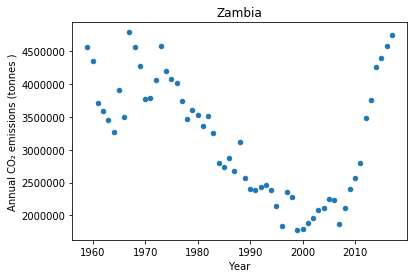

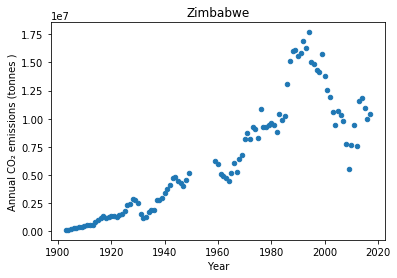

In [183]:
entities=list(df['Entity'].unique())
for entity in entities:
    print(df[df['Entity']==entity].plot(x ='Year', y='Annual CO₂ emissions (tonnes )',kind = 'scatter',title=entity))



# the relation between the years and the pollution amounts in last 50 years

In [184]:
df_years=df.groupby('Year')['Annual CO₂ emissions (tonnes )'].sum()
df_years=pd.DataFrame(df_years.reset_index()).sort_values('Year',ascending=False).head(70)
df_years

,Year,Annual CO₂ emissions (tonnes )
266,2017,8.947275e+10
265,2016,8.824962e+10
264,2015,8.768655e+10
263,2014,8.762096e+10
262,2013,8.700745e+10
...,...,...
201,1952,1.473291e+10
200,1951,1.452905e+10
199,1950,1.344649e+10
198,1949,1.239131e+10


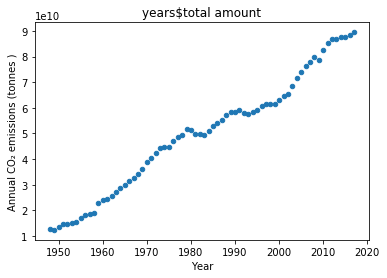

In [185]:
df_years.plot(x ='Year', y='Annual CO₂ emissions (tonnes )',kind = 'scatter',title='years$total amount')

# What is the average for increasing in pollution amount across the years?

In [186]:
df_years['Average']=df_years['Annual CO₂ emissions (tonnes )']/df_years.shape[0]
df_years.sort_values('Average',ascending=False).head(20)

,Year,Annual CO₂ emissions (tonnes ),Average
266,2017,8.947275e+10,1.278182e+09
265,2016,8.824962e+10,1.260709e+09
264,2015,8.768655e+10,1.252665e+09
263,2014,8.762096e+10,1.251728e+09
262,2013,8.700745e+10,1.242964e+09
261,2012,8.665080e+10,1.237869e+09
260,2011,8.524361e+10,1.217766e+09
259,2010,8.238109e+10,1.176873e+09
257,2008,7.990948e+10,1.141564e+09
258,2009,7.867301e+10,1.123900e+09


# comment:
* as shown in the results there is increase in the Average from year and year except (2008-2009 )[as the average amount in 2009 is less than 2008 with avery small diference ,reached to .02 only in average]